In [120]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
import requests, re
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

# 아래 url에서 기사들의 링크를 추출
- list_url에 저장
- https://news.daum.net/digital#1

In [122]:
url_home = 'https://news.daum.net/digital#1'

In [123]:
response = requests.get(url_home)
print(response.status_code)

200


In [124]:
html_home = response.text

In [125]:
soup = BeautifulSoup(html_home, 'html.parser')
list_tagA = soup.find_all('a')
print(len(list_tagA), list_tagA)

95 [<a href="#mainContent">본문 바로가기</a>, <a href="#gnbContent">메뉴 바로가기</a>, <a class="link_daum" data-tiara-layer="gnb default logo" href="https://www.daum.net/">
<img alt="Daum" class="logo_daum" height="18" src="//t1.daumcdn.net/media/common/newsview_2021/pc/rtn/logo_daum.png" width="44"/>
</a>, <a data-tiara-layer="GNB service news" href="https://news.daum.net/" id="kakaoServiceLogo">
<span class="ir_wa">뉴스</span>
</a>, <a class="link_services" data-tiara-layer="enter" href="https://entertain.daum.net">연예</a>, <a class="link_services" data-tiara-layer="sports" href="https://sports.daum.net">스포츠</a>, <a class="link_gnb" data-tiara-layer="home" href="/"><span class="txt_gnb">홈</span></a>, <a class="link_gnb" data-tiara-layer="society" href="/society"><span class="txt_gnb">사회</span></a>, <a class="link_gnb" data-tiara-layer="politics" href="/politics"><span class="txt_gnb">정치</span></a>, <a class="link_gnb" data-tiara-layer="economic" href="/economic"><span class="txt_gnb">경제</span></a>

In [126]:
list_link = []
for a in list_tagA:
    link = a['href'] 
    if re.match('https://v.daum.net/', link):
        list_link.append(link)

In [127]:
len(list_link), list_link

(40,
 ['https://v.daum.net/v/20220724195144891',
  'https://v.daum.net/v/20220724195144891',
  'https://v.daum.net/v/20220724193622770',
  'https://v.daum.net/v/20220724193622770',
  'https://v.daum.net/v/20220724175135716',
  'https://v.daum.net/v/20220724175135716',
  'https://v.daum.net/v/20220724170915815',
  'https://v.daum.net/v/20220724170915815',
  'https://v.daum.net/v/20220724164926489',
  'https://v.daum.net/v/20220724164926489',
  'https://v.daum.net/v/20220724163501269',
  'https://v.daum.net/v/20220724163501269',
  'https://v.daum.net/v/20220724161102779',
  'https://v.daum.net/v/20220724160839748',
  'https://v.daum.net/v/20220724151803882',
  'https://v.daum.net/v/20220724150103589',
  'https://v.daum.net/v/20220724140104283',
  'https://v.daum.net/v/20220724133702962',
  'https://v.daum.net/v/20220724134013011',
  'https://v.daum.net/v/20220724130003393',
  'https://v.daum.net/v/20220724120250757',
  'https://v.daum.net/v/20220724111531927',
  'https://v.daum.net/v/202

In [129]:
list_link = list(set(list_link))

In [130]:
len(list_link), list_link

(24,
 ['https://v.daum.net/v/20220724161102779',
  'https://v.daum.net/v/20220723102700158',
  'https://v.daum.net/v/20220724120042668',
  'https://v.daum.net/v/20220724195144891',
  'https://v.daum.net/v/20220724112001981',
  'https://v.daum.net/v/20220724133702962',
  'https://v.daum.net/v/20220724175135716',
  'https://v.daum.net/v/20220724151803882',
  'https://v.daum.net/v/20220724150103589',
  'https://v.daum.net/v/20220724140104283',
  'https://v.daum.net/v/20220724130003393',
  'https://v.daum.net/v/20220724130003392',
  'https://v.daum.net/v/20220724160839748',
  'https://v.daum.net/v/20220724193622770',
  'https://v.daum.net/v/20220724153113091',
  'https://v.daum.net/v/20220724070021810',
  'https://v.daum.net/v/20220724134013011',
  'https://v.daum.net/v/20220724111531927',
  'https://v.daum.net/v/20220724160140614',
  'https://v.daum.net/v/20220724163501269',
  'https://v.daum.net/v/20220724164926489',
  'https://v.daum.net/v/20220724170915815',
  'https://v.daum.net/v/202

# 기사링크에서 기사본문>한글만 추출
- 특수기호등 제외한 기사 본문 내용만 str_text에 저장

In [133]:
str_text = ""

In [134]:
for link_test in list_link:
    response = requests.get(link_test)
#     print(response.status_code)

    html_test = response.text
    soup = BeautifulSoup(html_test, 'html.parser')
    list_tagP = soup.find_all('p')
#     print(len(list_tagP))

    for p in list_tagP:
        if re.match('<p.*dmcf-ptype="general">', str(p)):
#             print(p.text)
            str_text += p.text

In [135]:
len(str_text)

46262

In [138]:
str_text[:5000]

'척추동물 중 외부 기온 변화에 체온이 변하지 않고 일정하게 유지할 수 있는 온혈(정온)동물은 조류와 포유류뿐이다. 고생물학 분야에서 ‘포유류가 언제 온혈동물로 진화했는가’는 풀리지 않은 수수께끼로 남아있다.이 같은 상황에서 포르투갈, 프랑스, 영국, 독일, 남아프리카공화국, 미국, 아르헨티나 7개국 과학자들로 구성된 국제 공동 연구팀은 화석 분석과 시뮬레이션을 바탕으로 중생대 말기에 포유류가 냉혈동물에서 온혈동물로 진화했을 것이라고 24일 밝혔다.이번 연구에는 포르투갈 리스본대 플라스마·핵융합연구소를 중심으로 프랑스 몽펠리에대, 영국 런던 자연사박물관, 런던대(UCL), 독일 막스플랑크 진화인류학연구소, 예나대, 남아공 비트바테르스란트대, 미국 워싱턴 자연사박물관, 텍사스 오스틴대, 샌디에고 주립대, 샌디에고 자연사박물관, 시카고대, 뉴욕 자연사박물관, 시애틀 워싱턴대, 필즈 자연사박물관, 아르헨티나 자연과학박물관 소속 생물학자, 고생물학자, 물리학자, 수학자 등이 참여했다. 이번 연구 결과는 과학저널 ‘네이처’ 7월 21일자에 실렸다.내온동물(endotherms)이라고도 불리는 온혈동물은 체내 대사를 빠르게 해 높은 체온을 일정하게 유지할 수 있다. 반면 외온동물(ectotherms)인 냉혈동물은 대사율이 낮아 체온을 유지하기 위해 환경에 의존한다. 이 때문에 급격한 외부 온도 변화는 냉혈동물의 생존을 위협할 수 있다.파충류와 비슷한 모습의 포유류 조상이 온혈동물로 진화한 것은 분명하지만 화석만으로는 측정이 어렵기 때문에 그 시기에 대해서 의견이 분분했다. 과학자들은 키나 뼈 구조 같은 골격 특징으로 대사율을 추정해 온혈동물 등장 시기가 1억 4500만~6600만년 전이라는 주장이 있는가 하면, 3억~2억 5000만년 전으로 추정한 연구도 있었다.연구팀은 체온을 측정할 때 귀를 이용하는 것에 착안해 내이(內耳)의 뼈세관(bone canal) 모양과 크기로 체온을 추정하는 방법을 개발했다. 뼈세관을 통한 체액 이동은 신체가 시각과 균형에 필수적인 머리 위치와

In [140]:
str_text = re.sub('[^가-힣]+', ' ', str_text)
str_text[:5000]

'척추동물 중 외부 기온 변화에 체온이 변하지 않고 일정하게 유지할 수 있는 온혈 정온 동물은 조류와 포유류뿐이다 고생물학 분야에서 포유류가 언제 온혈동물로 진화했는가 는 풀리지 않은 수수께끼로 남아있다 이 같은 상황에서 포르투갈 프랑스 영국 독일 남아프리카공화국 미국 아르헨티나 개국 과학자들로 구성된 국제 공동 연구팀은 화석 분석과 시뮬레이션을 바탕으로 중생대 말기에 포유류가 냉혈동물에서 온혈동물로 진화했을 것이라고 일 밝혔다 이번 연구에는 포르투갈 리스본대 플라스마 핵융합연구소를 중심으로 프랑스 몽펠리에대 영국 런던 자연사박물관 런던대 독일 막스플랑크 진화인류학연구소 예나대 남아공 비트바테르스란트대 미국 워싱턴 자연사박물관 텍사스 오스틴대 샌디에고 주립대 샌디에고 자연사박물관 시카고대 뉴욕 자연사박물관 시애틀 워싱턴대 필즈 자연사박물관 아르헨티나 자연과학박물관 소속 생물학자 고생물학자 물리학자 수학자 등이 참여했다 이번 연구 결과는 과학저널 네이처 월 일자에 실렸다 내온동물 이라고도 불리는 온혈동물은 체내 대사를 빠르게 해 높은 체온을 일정하게 유지할 수 있다 반면 외온동물 인 냉혈동물은 대사율이 낮아 체온을 유지하기 위해 환경에 의존한다 이 때문에 급격한 외부 온도 변화는 냉혈동물의 생존을 위협할 수 있다 파충류와 비슷한 모습의 포유류 조상이 온혈동물로 진화한 것은 분명하지만 화석만으로는 측정이 어렵기 때문에 그 시기에 대해서 의견이 분분했다 과학자들은 키나 뼈 구조 같은 골격 특징으로 대사율을 추정해 온혈동물 등장 시기가 억 만 만년 전이라는 주장이 있는가 하면 억 억 만년 전으로 추정한 연구도 있었다 연구팀은 체온을 측정할 때 귀를 이용하는 것에 착안해 내이 의 뼈세관 모양과 크기로 체온을 추정하는 방법을 개발했다 뼈세관을 통한 체액 이동은 신체가 시각과 균형에 필수적인 머리 위치와 움직임을 파악할 수 있게 해준다 또 체액의 점도는 체온에 따라 변한다 그래서 연구팀은 체온이 상승하고 움직임이 활발해짐에 따라 균형과 운동성을 유지하기 위해 내이도 모양이

## noun 뽑기

- Okt.pos(_STR_)사용하여 (단어, 품사)의 list를 list_morph에 저장
- 두글자 이상의 noun만 list_noun에 저장 

In [141]:
okt = Okt()
list_morph = okt.pos(str_text)
list_morph

[('척추동물', 'Noun'),
 ('중', 'Noun'),
 ('외부', 'Noun'),
 ('기온', 'Noun'),
 ('변화', 'Noun'),
 ('에', 'Josa'),
 ('체온', 'Noun'),
 ('이', 'Josa'),
 ('변하지', 'Adjective'),
 ('않고', 'Verb'),
 ('일정하게', 'Adjective'),
 ('유지', 'Noun'),
 ('할', 'Verb'),
 ('수', 'Noun'),
 ('있는', 'Adjective'),
 ('온', 'Modifier'),
 ('혈', 'Noun'),
 ('정온', 'Noun'),
 ('동물', 'Noun'),
 ('은', 'Josa'),
 ('조류', 'Noun'),
 ('와', 'Josa'),
 ('포유류', 'Noun'),
 ('뿐', 'Suffix'),
 ('이다', 'Josa'),
 ('고생물학', 'Noun'),
 ('분야', 'Noun'),
 ('에서', 'Josa'),
 ('포유류', 'Noun'),
 ('가', 'Josa'),
 ('언제', 'Noun'),
 ('온혈동물', 'Noun'),
 ('로', 'Josa'),
 ('진화', 'Noun'),
 ('했는가', 'Verb'),
 ('는', 'Verb'),
 ('풀리지', 'Verb'),
 ('않은', 'Verb'),
 ('수수께끼', 'Noun'),
 ('로', 'Josa'),
 ('남아있다', 'Verb'),
 ('이', 'Noun'),
 ('같은', 'Adjective'),
 ('상황', 'Noun'),
 ('에서', 'Josa'),
 ('포르투갈', 'Noun'),
 ('프랑스', 'Noun'),
 ('영국', 'Noun'),
 ('독일', 'Noun'),
 ('남아프리카공화국', 'Noun'),
 ('미국', 'Noun'),
 ('아르헨티나', 'Noun'),
 ('개국', 'Noun'),
 ('과학자', 'Noun'),
 ('들', 'Suffix'),
 ('로', 'Josa'),
 ('구성',

In [143]:
list_noun = []
for word, tag in list_morph:
    if (tag == 'Noun') & (len(word) > 1):
        list_noun.append(word)
print(list_noun)

['척추동물', '외부', '기온', '변화', '체온', '유지', '정온', '동물', '조류', '포유류', '고생물학', '분야', '포유류', '언제', '온혈동물', '진화', '수수께끼', '상황', '포르투갈', '프랑스', '영국', '독일', '남아프리카공화국', '미국', '아르헨티나', '개국', '과학자', '구성', '국제', '공동', '화석', '분석', '시뮬레이션', '바탕', '중생대', '말기', '포유류', '냉혈', '동물', '온혈동물', '진화', '이번', '연구', '포르투갈', '리스본', '플라스마', '핵융합', '연구소', '중심', '프랑스', '몽펠리에대', '영국', '런던', '자연사', '박물관', '런던대', '독일', '막스', '플랑크', '진화', '인류학', '연구소', '예나', '남아공', '비트바테르스란트', '미국', '워싱턴', '자연사', '박물관', '텍사스', '오스틴', '샌디에고', '주립대', '샌디에고', '자연사', '박물관', '시카고대', '뉴욕', '자연사', '박물관', '시애틀', '워싱턴', '필즈', '자연사', '박물관', '아르헨티나', '자연과학', '박물관', '소속', '생물학자', '고생물학자', '물리학자', '수학자', '참여', '이번', '연구', '결과', '과학', '네이처', '일자', '동물', '온혈동물', '체내', '대사', '체온', '유지', '반면', '동물', '냉혈', '동물', '대사율', '체온', '유지', '위해', '환경', '의존', '때문', '외부', '온도', '변화', '냉혈', '동물', '생존', '위협', '파충류', '모습', '포유류', '조상', '온혈동물', '진화', '화석', '측정', '때문', '시기', '대해', '의견', '과학자', '구조', '골격', '특징', '대사율', '추정', '온혈동물', '등장', '시기', '만년', '전이', '주장', '만년', '추정',

# 각 단어의 빈도수 확인
- Counter(_LIST_).most_common()으로 (단어, 빈도수)의 list를 list_freq에 저장하고 dict로 dict_freq에 저장

In [146]:
list_freq = Counter(list_noun).most_common()
dict_freq = dict(list_freq)

# 시각화
## barplot
- DataFrame으로 변경하여 sns.barplot사용

In [162]:
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

In [163]:
sr = pd.Series(dict_freq)

In [166]:
df = pd.DataFrame(sr, columns=['cnt'])
df10 = df.sort_values(by='cnt', ascending=False)[:20]
df10.reset_index(inplace=True)
df10

,index,cnt
0,반도체,57
1,한국,55
2,통신,52
3,정보,49
4,미국,42
5,금융,41
6,애플,37
7,연구,36
8,서비스,36
9,지난,32


<AxesSubplot:xlabel='index', ylabel='cnt'>

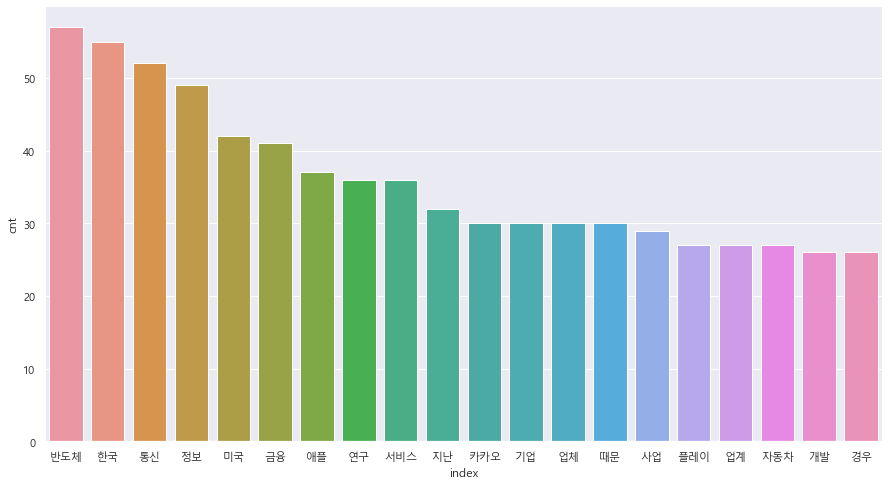

In [165]:
plt.figure(figsize = (15,8))
sns.barplot(x='index', y='cnt', data=df10, orient='v')

##  worldcloud
- WordCloud(...).generate_from_frequencies(_DICT_)
- matplotlib.pyplot.imshow(WordCloud)

In [170]:
wordcloud = WordCloud(font_path = '../03_Visualization/dataset/malgun.ttf', 
                       background_color='white', colormap='winter', 
                       width=1500, height=1500).generate_from_frequencies(dict_freq)

(-0.5, 1499.5, 1499.5, -0.5)

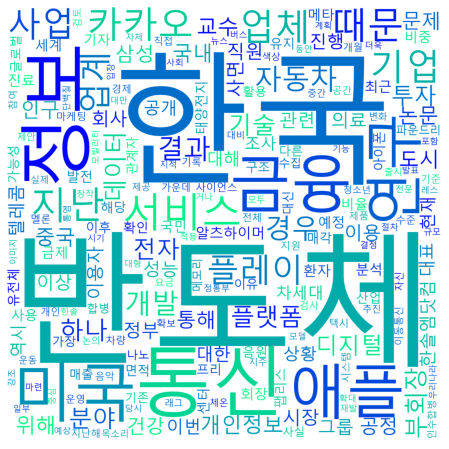

In [171]:
plt.imshow(wordcloud)
plt.axis('off')